## **Importing Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
# Dataset from github is now stored in a Pandas Dataframe
url = 'https://raw.githubusercontent.com/UTSVivian/2023SIS_Team9/main/loanData.csv?token=GHSAT0AAAAAACGUM7HKGI5EAWLQEQCCGF74ZIX6YBA'
df = pd.read_csv(url)

df.head()
print(df.shape)
print(df)

(500, 15)
     Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0             0  LP001002    Male      No          0      Graduate   
1             1  LP001003    Male     Yes          1      Graduate   
2             2  LP001005    Male     Yes          0      Graduate   
3             3  LP001006    Male     Yes          0  Not Graduate   
4             4  LP001008    Male      No          0      Graduate   
..          ...       ...     ...     ...        ...           ...   
495         495  LP002586  Female     Yes          1      Graduate   
496         496  LP002587    Male     Yes          0  Not Graduate   
497         497  LP002588    Male     Yes          0      Graduate   
498         498  LP002600    Male     Yes          1      Graduate   
499         499  LP002602    Male      No          0      Graduate   

    Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              No             5849                0.0         NaN   
1          

In [ ]:
df.drop(['Unnamed: 0', 'Loan_ID'], axis = 1, inplace = True)

# **Data Analysis**



In [ ]:
#understanding size and information of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    object 
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
 12  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


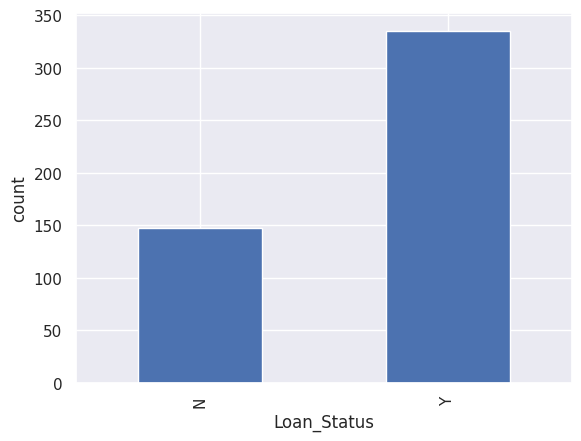

Y: 0.69%
N: 0.31%


In [ ]:
#target value
target = 'Loan_Status'

df.groupby(target)['LoanAmount'].count().plot.bar()
plt.ylabel('count')
plt.show()

print('Y: {}%'.format(df[target].value_counts()[0] / len(df)))
print('N: {}%'.format(df[target].value_counts()[1] / len(df)))

In [ ]:
#missing values
df.isnull().sum()

null_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in null_features:
    print('{}: {}% values missing'.format(feature, (df[feature].isnull().sum() / len(df)) * 100))

Gender: 1.7999999999999998% values missing
Married: 0.6% values missing
Dependents: 2.4% values missing
Self_Employed: 5.4% values missing
LoanAmount: 3.5999999999999996% values missing
Loan_Amount_Term: 2.8000000000000003% values missing
Credit_History: 8.200000000000001% values missing


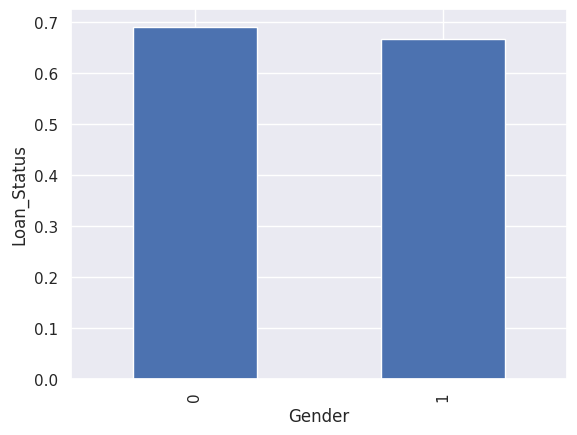

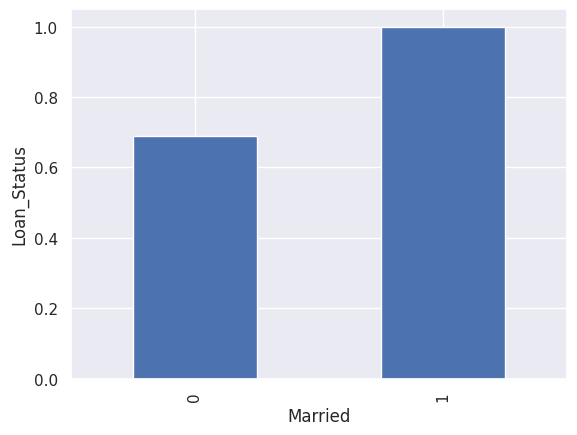

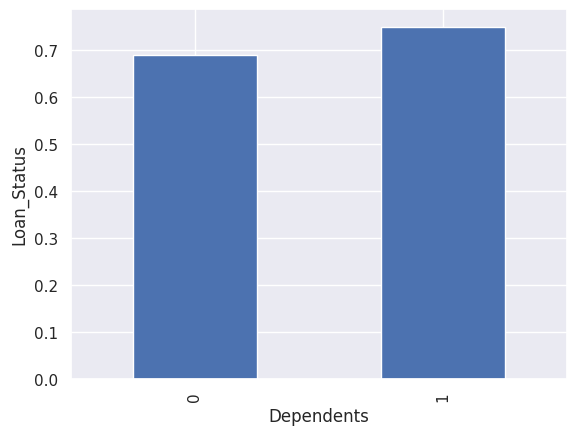

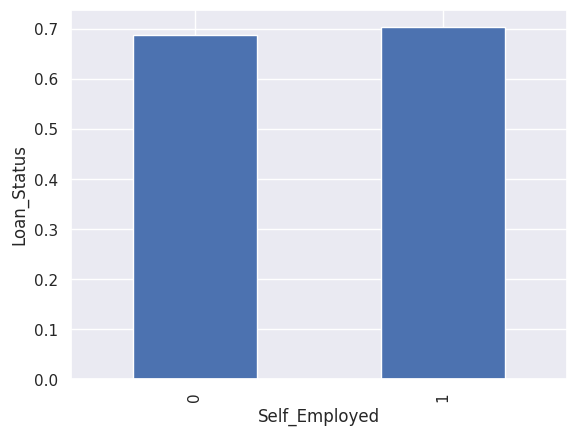

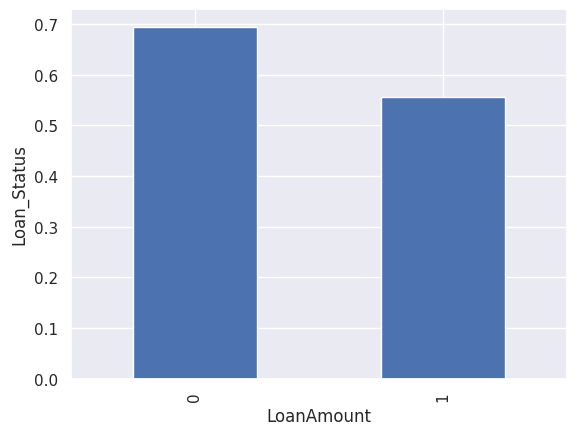

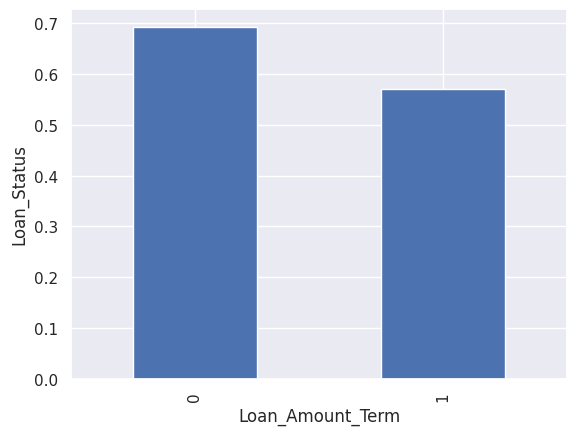

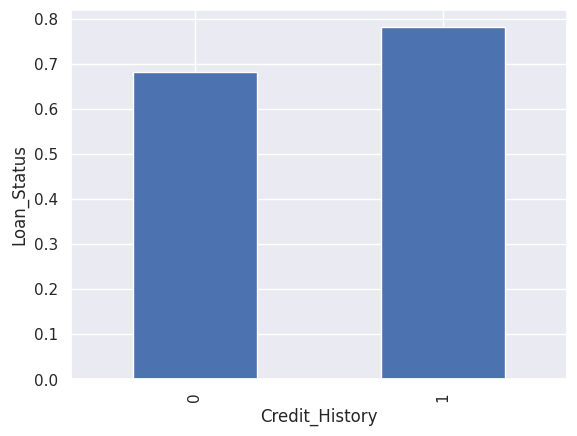

In [ ]:
#understanding realtionship between null values and target variable
for feature in null_features:
    data = df.copy()

    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data[target] = np.where(data[target] == 'Y', 1, 0)
    data.groupby(feature)[target].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

Observations: no significant relationship can be observed between loan status and missing values. The number of missing values is not
very large to impact the analysis significantly.

In [ ]:
nan_numeric = []
nan_categoric = []

for feature in null_features:
    if df[feature].dtype != 'O':
        nan_numeric.append(feature)
    else:
        nan_categoric.append(feature)

print('Numeric missing:', nan_numeric)
print('Categorical missing:', nan_categoric)

Numeric missing: ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical missing: ['Gender', 'Married', 'Dependents', 'Self_Employed']


In [ ]:
data = df.copy()
for feature in nan_categoric:
    data[feature] = np.where(data[feature].isnull(), data[feature].mode(), data[feature])

for feature in nan_numeric:
    data[feature] = np.where(data[feature].isnull(), int(data[feature].median()), data[feature])

data[target] = np.where(data[target] == 'Y', 1, 0)

Numeric Feature Analysis

In [ ]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [ ]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O' and feature != target]

data[num_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
0,5849,0.0,126.0,360.0,1.0,5849.0
1,4583,1508.0,128.0,360.0,1.0,6091.0
2,3000,0.0,66.0,360.0,1.0,3000.0
3,2583,2358.0,120.0,360.0,1.0,4941.0
4,6000,0.0,141.0,360.0,1.0,6000.0


In [ ]:
#understanding discrete variables
dis_features = [feature for feature in num_features if len(data[feature].unique()) < 20]

dis_features

['Loan_Amount_Term', 'Credit_History']

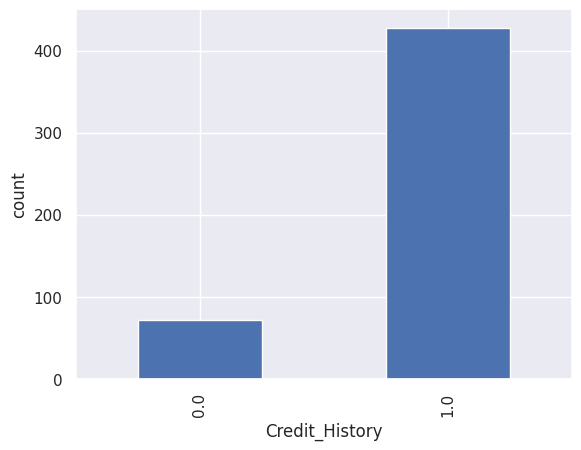

In [ ]:
#understanding distribution
for feature in dis_features:
  data.groupby(feature)[target].count().plot.bar()

  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show

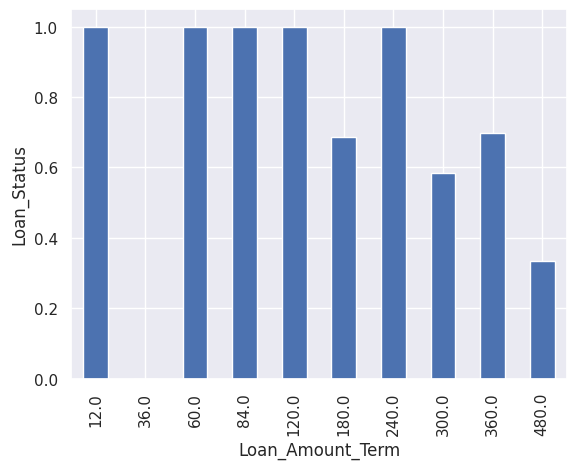

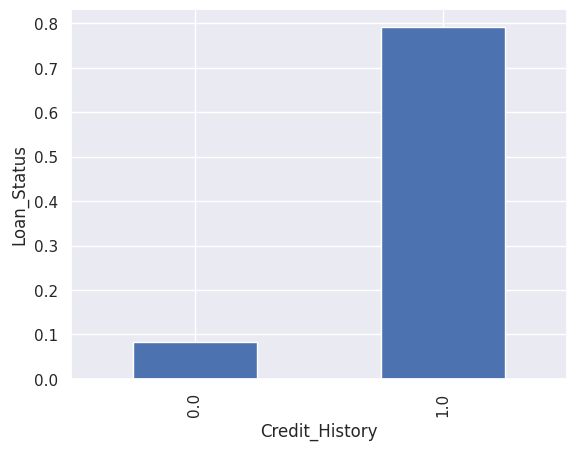

In [ ]:
for feature in dis_features:
  data.groupby(feature)[target].mean().plot.bar()

  plt.xlabel(feature)
  plt.ylabel(target)
  plt.show()

Observation: Credit Histroy variable affects the loan status

In [ ]:
#understanding continuous features
con_features =  [feature for feature in num_features if feature not in dis_features]

con_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

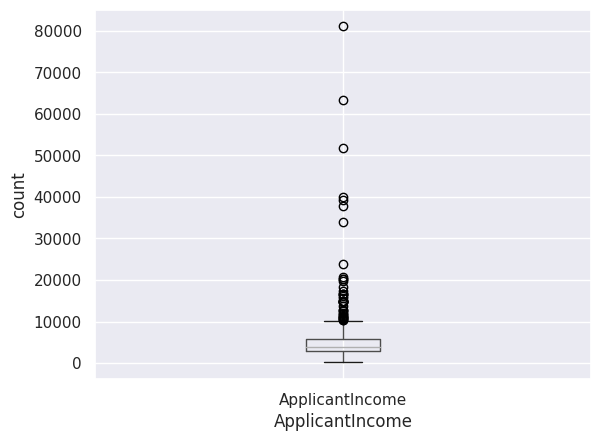

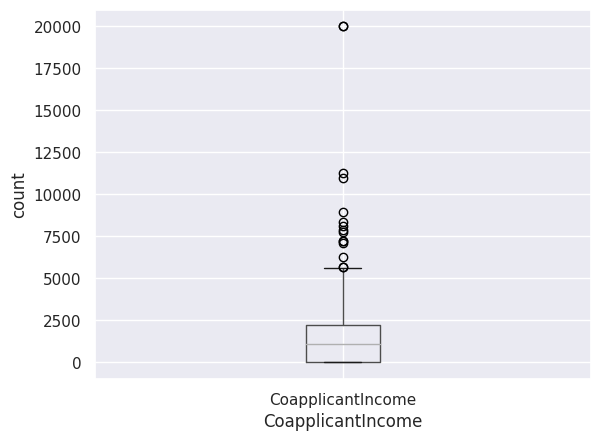

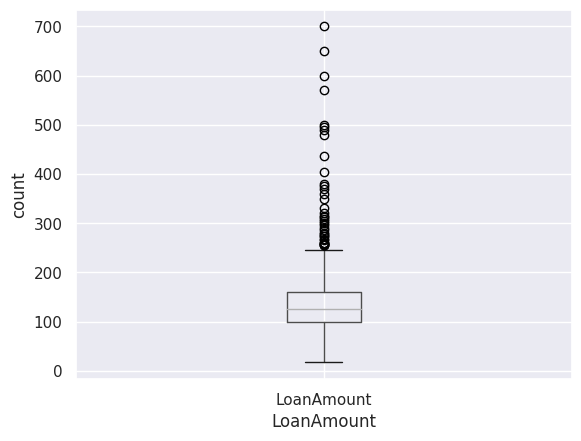

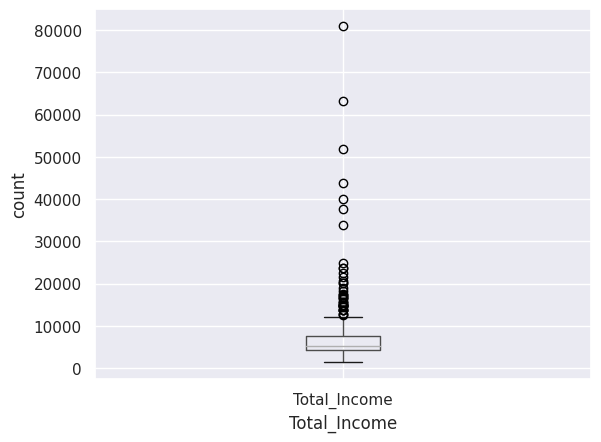

In [ ]:
for feature in con_features:
    data.boxplot(column = feature)

    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

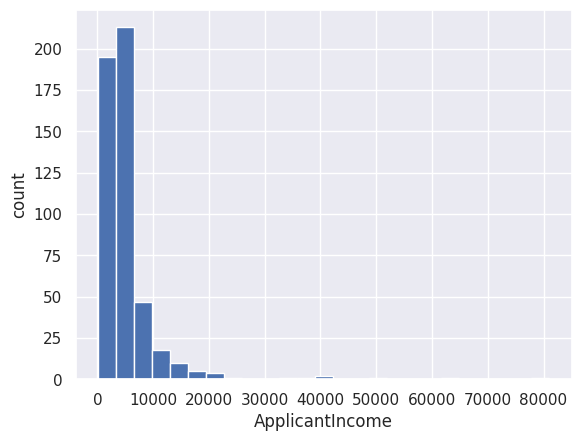

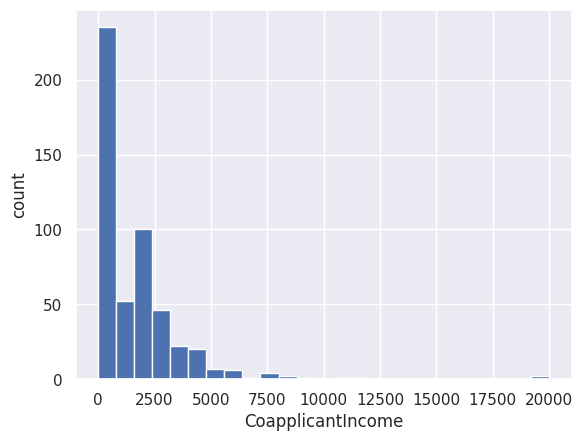

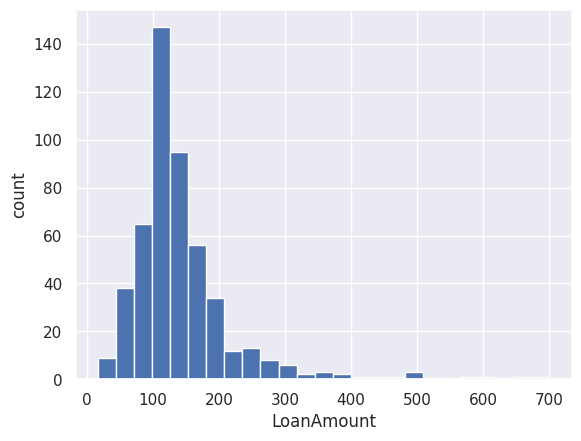

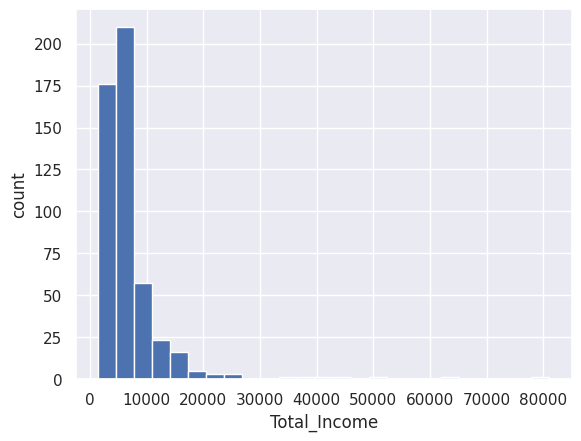

In [ ]:
for feature in con_features:
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

In [ ]:
#Data Transformation and understanding Outliers
for feature in con_features:
  extreme = data[feature].median() + 3 * data[feature].std()

  print(feature)
  print('Values to be replaced: {}%'.format((len(data.loc[data[feature] > extreme]) / len(data)) * 100))

ApplicantIncome
Values to be replaced: 1.6%
CoapplicantIncome
Values to be replaced: 1.7999999999999998%
LoanAmount
Values to be replaced: 2.6%
Total_Income
Values to be replaced: 1.4000000000000001%


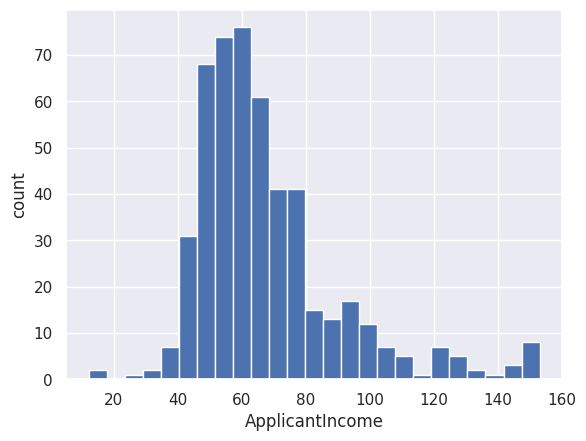

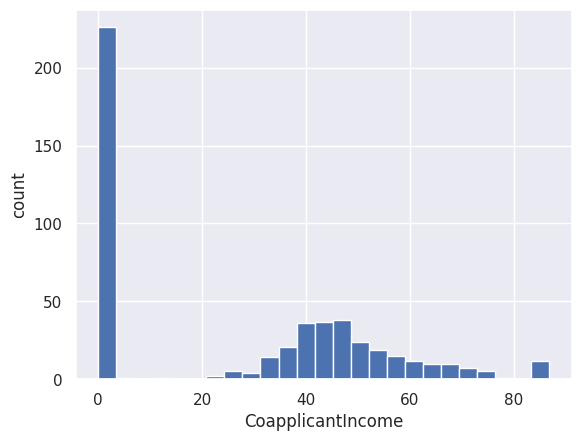

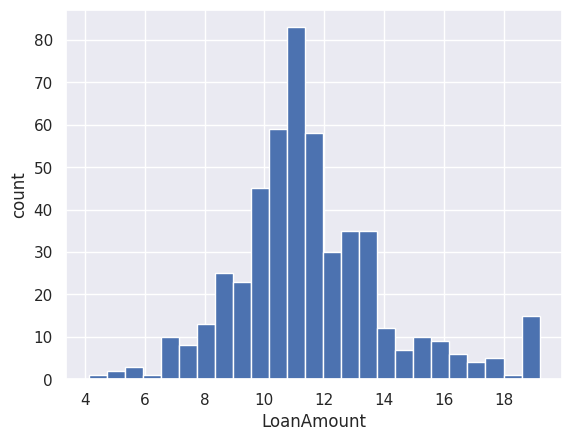

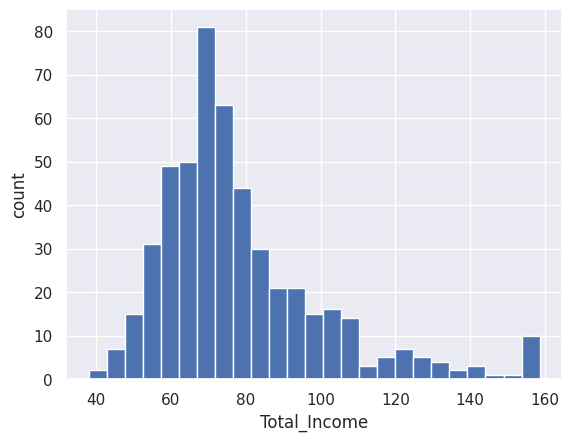

In [ ]:
for feature in con_features:
    extreme = data[feature].median() + 3 * data[feature].std()

    data[feature] = np.where(data[feature] > extreme, extreme, data[feature])
    data[feature] = data[feature] ** 0.5
    data[feature].hist(bins = 25)

    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

Categorical Feature Analysis

In [ ]:
cat_features = [feature for feature in data.columns if feature not in num_features and feature != target]

data[cat_features].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [ ]:
#understanding unique values
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(data[feature].unique())))

Gender: 2 categories
Married: 2 categories
Dependents: 4 categories
Education: 2 categories
Self_Employed: 2 categories
Property_Area: 3 categories


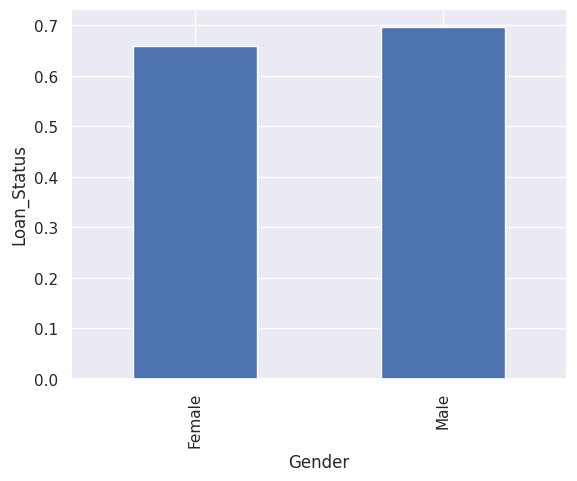

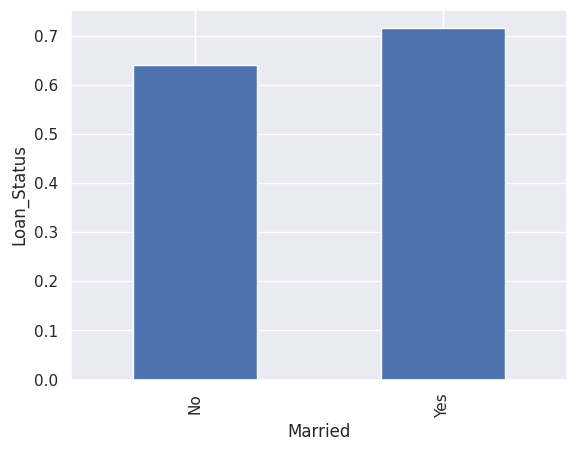

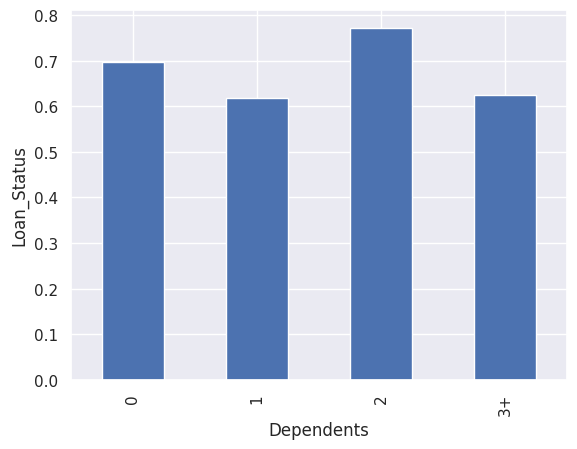

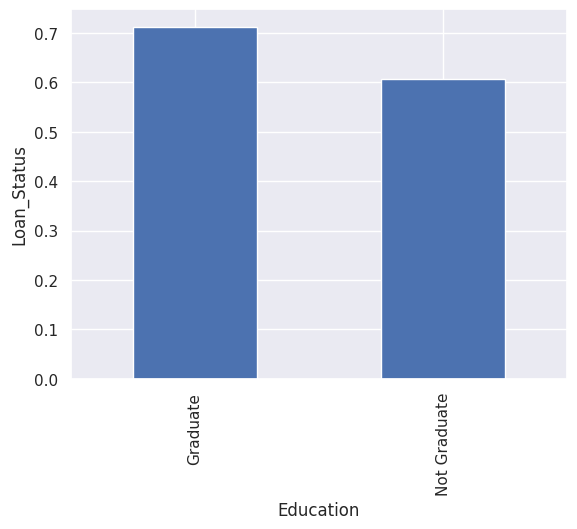

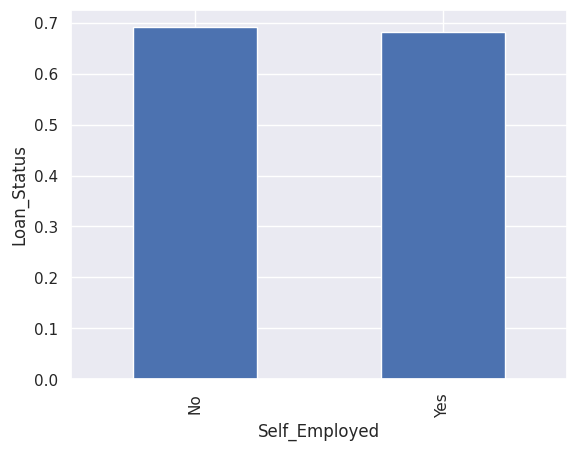

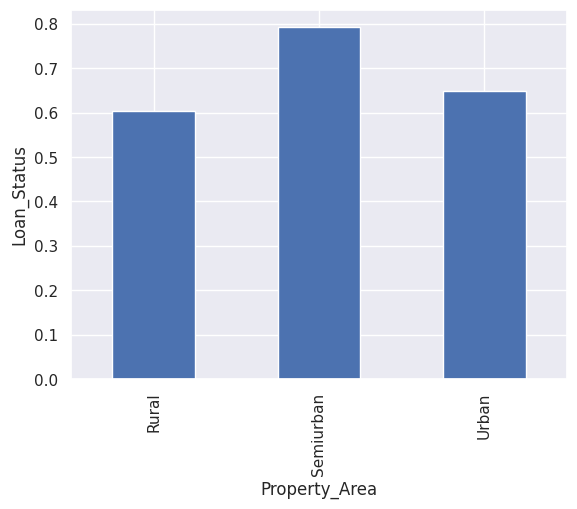

In [ ]:
for feature in cat_features:
    data.groupby(feature)[target].mean().plot.bar()

    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

No significant relationships can be decided


# **Feature Extraction**

In [ ]:
#target variable transformation
df[target] = np.where(df[target] == 'Y', 1, 0)

In [ ]:
#dealing with missing values
for feature in nan_categoric:
    df[feature] = np.where(df[feature].isnull(), df[feature].mode(), df[feature])

for feature in nan_numeric:
    df[feature] = np.where(df[feature].isnull(), int(df[feature].median()), df[feature])

In [ ]:
def univariate(df,col,vartype,hue =None):

    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.

    '''
    sb.set(style="darkgrid")

    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sb.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sb.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sb.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sb.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
        del temp
    else:
        exit

    plt.show()

In [ ]:
#dealing with outliers and transformation
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
for feature in con_features:

    extreme = df[feature].median() + 3 * df[feature].std()
    df[feature] = np.where(df[feature] > extreme, extreme, df[feature])

    df[feature] = df[feature] ** 0.5

In [ ]:
dummy_df = pd.get_dummies(df, drop_first = True)
dummy_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,76.478755,0.000000,11.224972,360.0,1.0,1,76.478755,1,0,0,0,0,0,0,0,1
1,67.697858,38.832976,11.313708,360.0,1.0,0,78.044859,1,1,1,0,0,0,0,0,0
2,54.772256,0.000000,8.124038,360.0,1.0,1,54.772256,1,1,0,0,0,0,1,0,1
3,50.823223,48.559242,10.954451,360.0,1.0,1,70.292247,1,1,0,0,0,1,0,0,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,77.459667,1,0,0,0,0,0,0,0,1


<ipython-input-120-7afe3ce0bcad>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


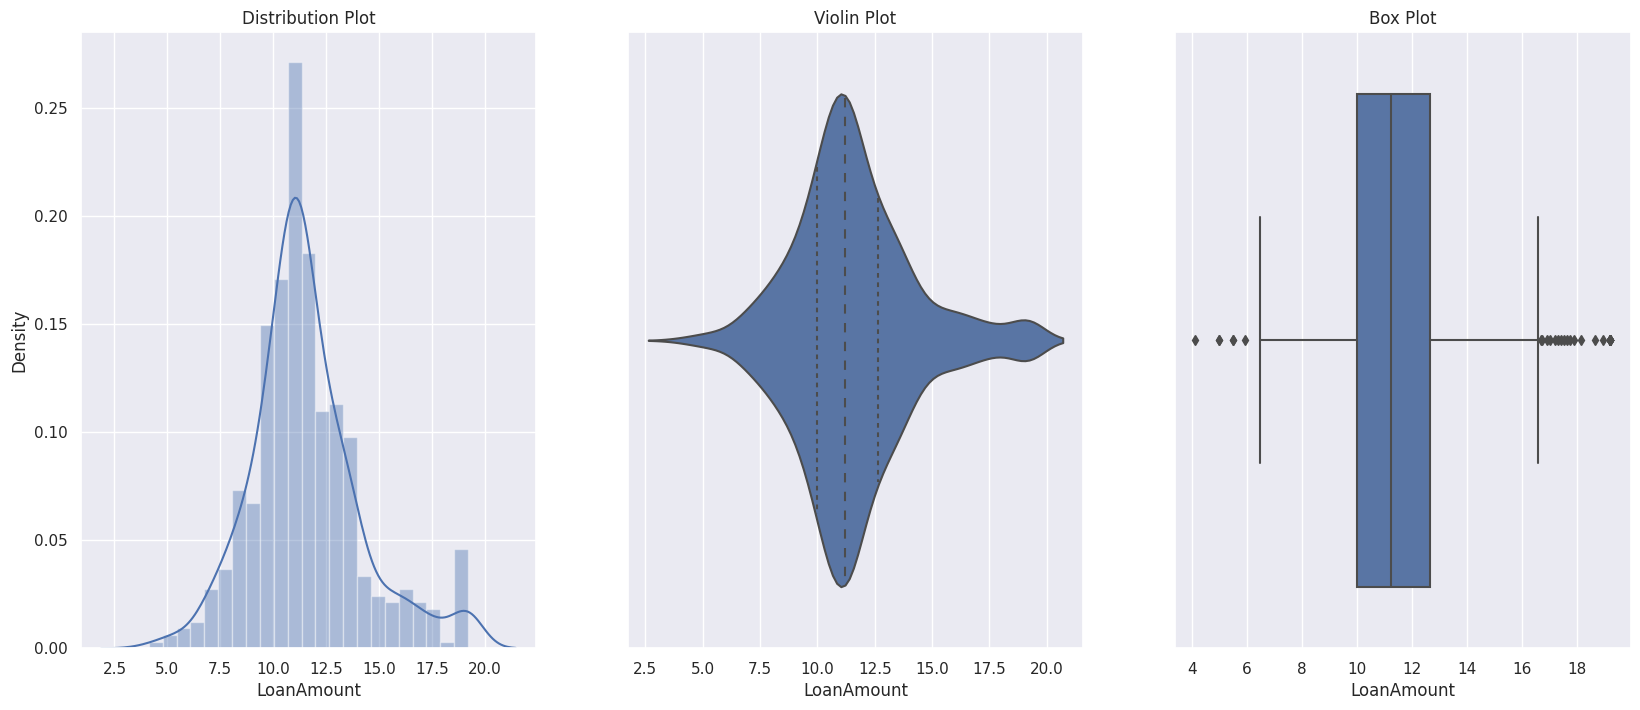

In [ ]:
univariate(df=dummy_df,col='LoanAmount',vartype=0)

observation: loan amount distribution between 10k and 13k

<ipython-input-120-7afe3ce0bcad>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


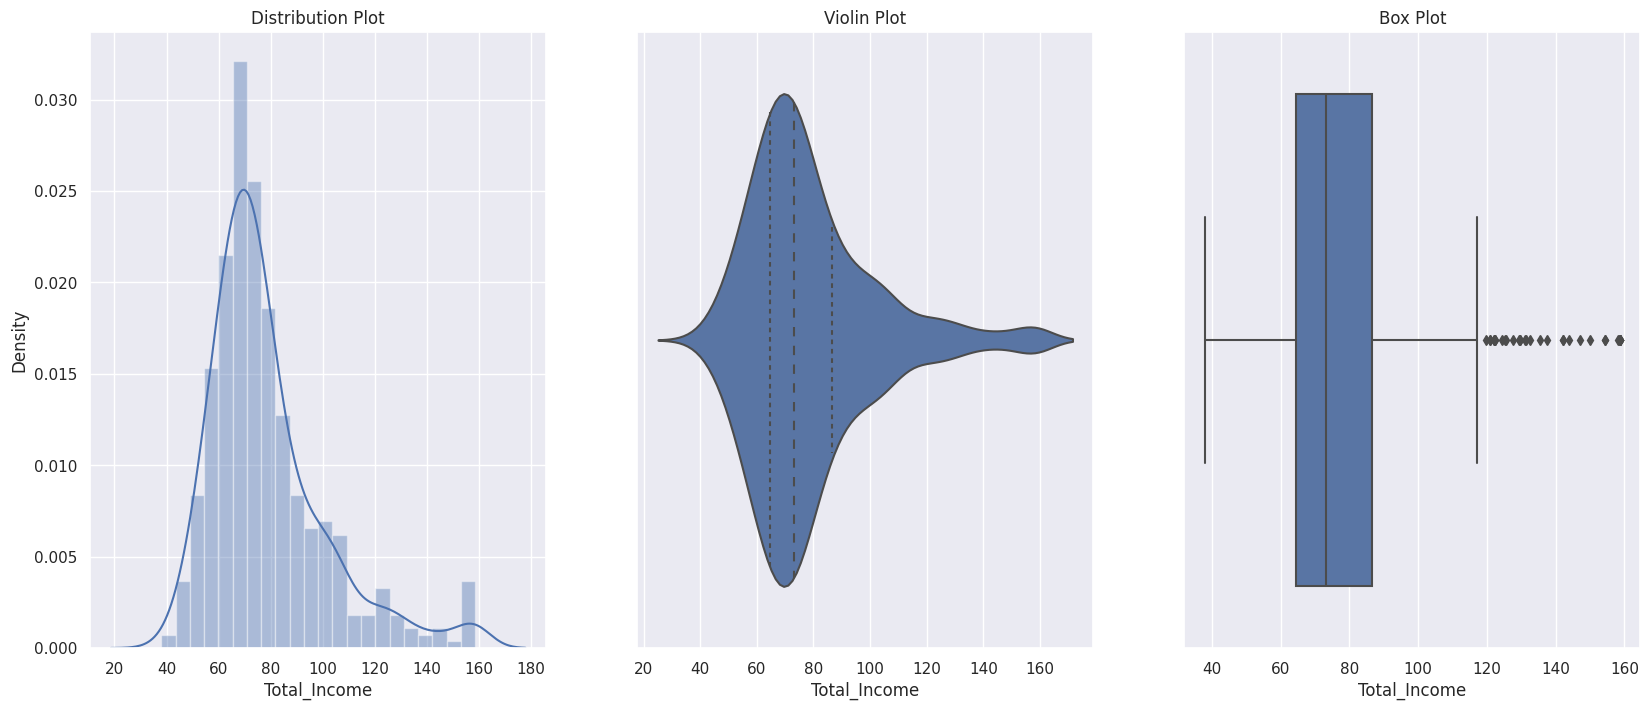

In [ ]:
univariate(df=dummy_df,col='Total_Income',vartype=0)

observation: most of the applicants and coapplocants earns beteen 61k to 85k USD annually.

# **Feature Selection**

In [ ]:
X = dummy_df.drop('Loan_Status', axis = 1)
y = dummy_df['Loan_Status']

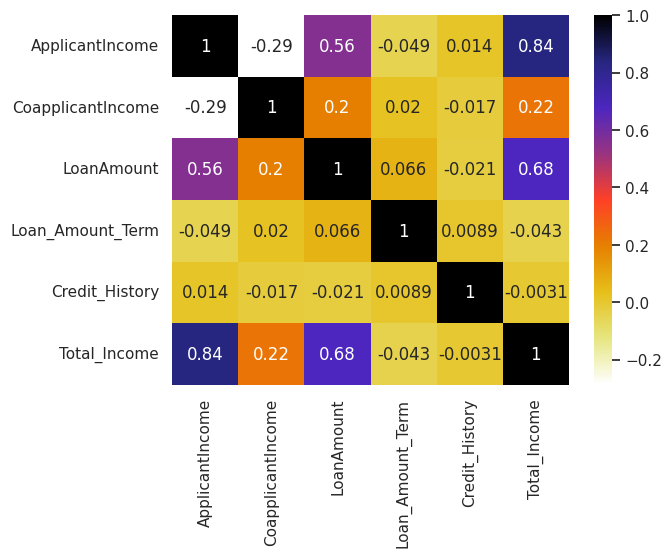

In [ ]:
#correlation graph
cor = X[num_features].corr()

sb.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

no significant relationship present

# Models



In [ ]:
#importing models

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **KNN**

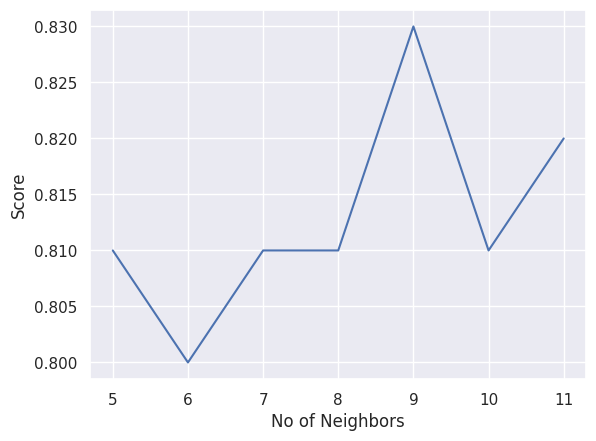

Best score = 0.83
 Neighbors = 9


In [ ]:
scores = []

for i in range(5, 12):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))

plt.plot(np.arange(5, 12), scores)
plt.xlabel('No of Neighbors')
plt.ylabel('Score')
plt.show()

best_neighbors = np.arange(5, 12)[scores.index(max(scores))]
print('Best score = {}\n Neighbors = {}'.format(max(scores), best_neighbors))

In [ ]:
model = KNeighborsClassifier(n_neighbors = best_neighbors)
model.fit(X_train_scaled, y_train)

y_pred_knn = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, digits = 4))

[[10 16]
 [ 1 73]]
              precision    recall  f1-score   support

           0     0.9091    0.3846    0.5405        26
           1     0.8202    0.9865    0.8957        74

    accuracy                         0.8300       100
   macro avg     0.8647    0.6856    0.7181       100
weighted avg     0.8433    0.8300    0.8034       100



# **SVM**

In [ ]:
model = SVC()

model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_pred_svc = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, digits = 4))

[[14 12]
 [ 1 73]]
              precision    recall  f1-score   support

           0     0.9333    0.5385    0.6829        26
           1     0.8588    0.9865    0.9182        74

    accuracy                         0.8700       100
   macro avg     0.8961    0.7625    0.8006       100
weighted avg     0.8782    0.8700    0.8571       100



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Random Forest**

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits = 4))

[[14 12]
 [ 3 71]]
              precision    recall  f1-score   support

           0     0.8235    0.5385    0.6512        26
           1     0.8554    0.9595    0.9045        74

    accuracy                         0.8500       100
   macro avg     0.8395    0.7490    0.7778       100
weighted avg     0.8471    0.8500    0.8386       100



# **Model Evaluation**



In [ ]:
model = KNeighborsClassifier(n_neighbors = best_neighbors)

scores = cross_val_score(model, X_train_scaled, y_train, cv = 10)
print(np.mean(scores))

0.7300000000000001


In [ ]:
model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 10)
print(np.mean(scores))

0.76


In [ ]:
model = SVC()

scores = cross_val_score(model, X_train_scaled, y_train, cv = 10)
print(np.mean(scores))

0.7949999999999999


**observation: use svm model**

# Model serialization

In [ ]:
!pip install skl2onnx
import skl2onnx
model.fit(X_train, y_train)
onx = skl2onnx.to_onnx(model, X=X_train)
skl2onnx.helpers.onnx_helper.save_onnx_model(onx, './onnx.onnx')


b'\x08\x08\x12\x08skl2onnx\x1a\x061.15.0"\x07ai.onnx(\x002\x00:\x99\xb5\x01\n\xb9\xb0\x01\n\x0fApplicantIncome\x12\x05label\x12\x05SVM02\x1a\x04SVMc"\rSVMClassifier*\x19\n\x10classlabels_ints@\x00@\x01\xa0\x01\x07*\x84\x0b\n\x0ccoefficients=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x00\x00\x80?=\x0